In [2]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=ebafe2c67191d0bdc7a7f00158288e9664fbe8c5852e5fb3346f1032047abf41
  Stored in directory: c:\users\anindya\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import argparse
import cv2
import os
import time
import np_utils


import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

In [2]:
data_dir =  r'dataset'
data = load_files(data_dir)

In [3]:
folders=os.listdir("dataset")
print(folders)

['Covid-19', 'No_findings']


In [4]:
#Convert the data and labels to Numpy arrays
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X[0])
print('Target labels - ',y[0])
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Data files -  dataset\No_findings\00002550_000.png
Target labels -  1
Number of training files :  625
Number of training targets :  625


In [5]:
def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 150,150 
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
    return arr
X = np.array(convert_img_to_arr(X))

print(X.shape) 
print('First training item : ',X[0])

(625, 150, 150, 3)
First training item :  [[[27. 27. 27.]
  [35. 35. 35.]
  [23. 23. 23.]
  ...
  [22. 22. 22.]
  [22. 22. 22.]
  [23. 23. 23.]]

 [[22. 22. 22.]
  [25. 25. 25.]
  [22. 22. 22.]
  ...
  [22. 22. 22.]
  [22. 22. 22.]
  [22. 22. 22.]]

 [[23. 23. 23.]
  [22. 22. 22.]
  [22. 22. 22.]
  ...
  [22. 22. 22.]
  [23. 23. 23.]
  [23. 23. 23.]]

 ...

 [[29. 29. 29.]
  [66. 66. 66.]
  [76. 76. 76.]
  ...
  [58. 58. 58.]
  [66. 66. 66.]
  [67. 67. 67.]]

 [[23. 23. 23.]
  [50. 50. 50.]
  [71. 71. 71.]
  ...
  [55. 55. 55.]
  [70. 70. 70.]
  [76. 76. 76.]]

 [[21. 21. 21.]
  [25. 25. 25.]
  [56. 56. 56.]
  ...
  [51. 51. 51.]
  [79. 79. 79.]
  [83. 83. 83.]]]


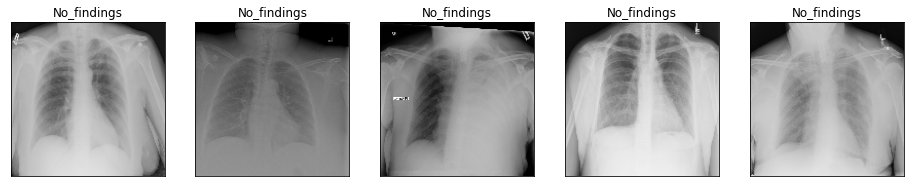

In [6]:
#First 5 training data. 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [7]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

2

In [8]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [10]:
#binary matrix using one-hot encoding
y = np.array(keras.utils.np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 1.], dtype=float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The train Data Shape ', X_train.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The validation Data Shape ', X_valid.shape[0])
print('The test Data Shape ', X_test.shape[0])

The train Data Shape  500
The validation Data Shape  63
The test Data Shape  62


In [12]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 Maxpool_1 (MaxPooling2D)    (None, 74, 74, 32)        0         
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 36, 36, 64)        0

In [15]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)

In [16]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 20
batch_size=32

train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)

validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)

checkpointer = ModelCheckpoint("best_model.h5", save_best_only = True, verbose = 1)


start = time.time()
history=model.fit(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            validation_steps=len(X_valid) //batch_size, 
                            callbacks=[checkpointer, learning_rate_reduction])

end = time.time()
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 4.1064 - accuracy: 0.7521
Epoch 1: val_loss improved from inf to 1.20788, saving model to best_model.h5
15/15 [==============================] - 49s 3s/step - loss: 4.1064 - accuracy: 0.7521 - val_loss: 1.2079 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.8034
Epoch 2: val_loss improved from 1.20788 to 0.53746, saving model to best_model.h5
15/15 [==============================] - 33s 2s/step - loss: 0.6036 - accuracy: 0.8034 - val_loss: 0.5375 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.8120
Epoch 3: val_loss improved from 0.53746 to 0.37357, saving model to best_model.h5
15/15 [==============================] - 25s 2s/step - loss: 0.4781 - accuracy: 0.8120 - val_loss: 0.3736 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 4/20
15/15 [==============================] 

In [17]:
#Testing/validation
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Loss: {}".format(eval_loss))

2/2 - 1s - loss: 0.1188 - accuracy: 0.9677 - 729ms/epoch - 364ms/step
Accuracy: 96.77%
Loss: 0.11881951242685318


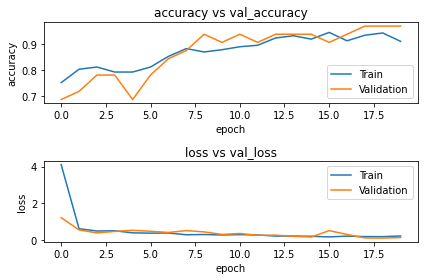

In [18]:
#Visualization
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1) 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  

    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
plot(history)

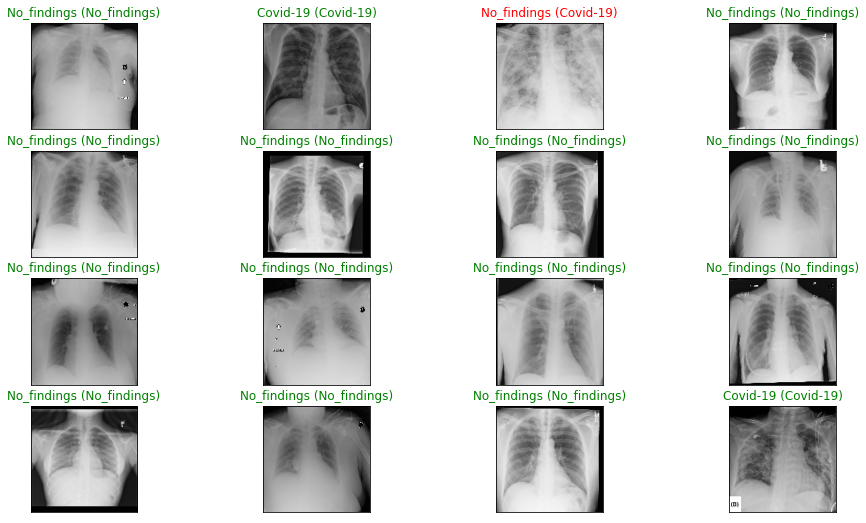

In [19]:
#Rnadom Prediction
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

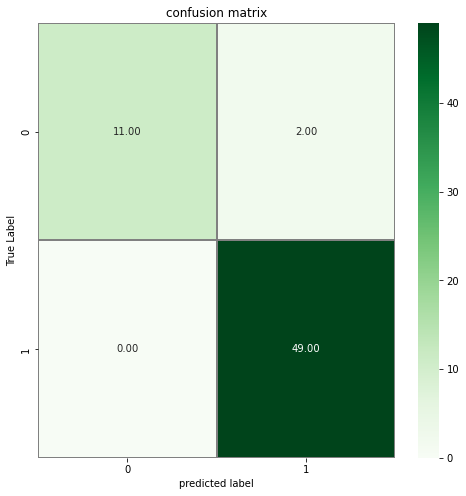

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [21]:
print(classification_report(y_test.argmax(axis=1),Y_pred_classes,  target_names= labels))

              precision    recall  f1-score   support

    Covid-19       1.00      0.85      0.92        13
 No_findings       0.96      1.00      0.98        49

    accuracy                           0.97        62
   macro avg       0.98      0.92      0.95        62
weighted avg       0.97      0.97      0.97        62



In [22]:
my_model=keras.models.load_model("best_model.h5")

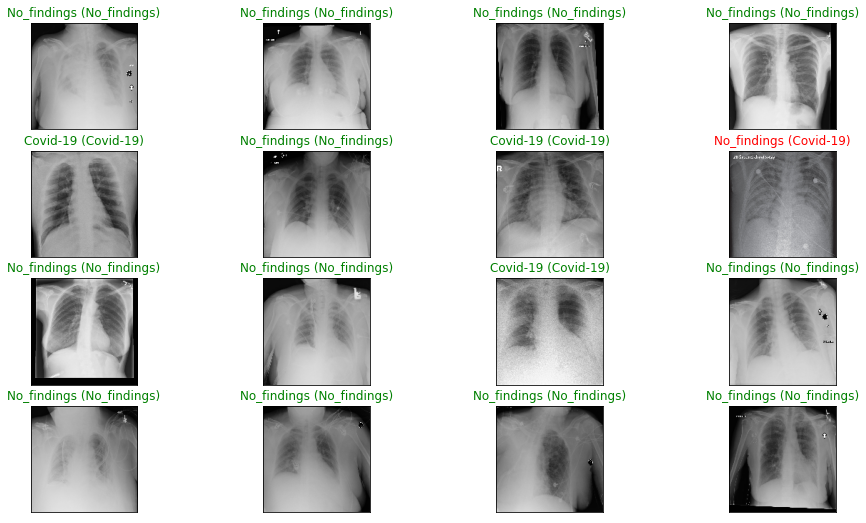

In [23]:
#Testing more predictions:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))